In [71]:
import cartopy.crs as ccrs
from pyresample import geometry, grid
import pyresample
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [81]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[23:37] == x[27:41]:
            return x

def date(filename):
    date = datetime.datetime.strptime(filename[23:30], '%Y%j').date()
    return date.strftime('%m/%d/%Y')

filedates = set()
files = []

for file in os.listdir('../../GOES_Files/npy_files'):
    filedates.add(file[27:41])

for file in os.listdir('../../GOES_Files/clear_sky_mask'):
    if file[23:37] in filedates:
        files.append(file)

In [2]:
pc = ccrs.PlateCarree()
pc_params = pc.proj4_params
pc_extents = [-124.25, -114.25, 32.25, 42.25]
target_extents = [pc_extents[0],
                    pc_extents[2],
                    pc_extents[1],
                    pc_extents[3]]
target_rows = 500
target_cols = 500
shape = [target_rows, target_cols]
target_area = geometry.AreaDefinition.from_extent('CA', pc_params, shape, target_extents)

In [69]:
latlon = [39.776, -122.673]
target_area.get_array_coordinates_from_lonlat(latlon[1], latlon[0])

(78.35000000000178, 123.20000000000064)

In [92]:
path = '../../GOES_Files/npy_files/'
CM = random.choice(files)
files.remove(CM)

file07 = find_npy_file('../../GOES_Files/npy_files', CM, '07')
file14 = find_npy_file('../../GOES_Files/npy_files', CM, '14')

img07 = np.load(path + file07)
img14 = np.load(path + file14)

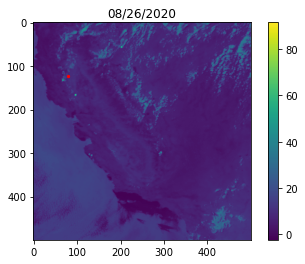

In [93]:
diff = img07 - img14

plt.imshow(diff)
plt.colorbar()

plt.scatter(coords[0], coords[1], color = 'r', s = 5)
plt.title(date(CM))

# plt.savefig(date(CM) + ".png")
plt.show()
plt.close()